In [203]:
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
# CSV 파일 읽기
df = pd.read_csv('mtcars.csv')

In [205]:
# 명명되지 않은 열 이름을 name으로 변경
if 'Unnamed: 0' in df.columns:
    print("[Rename column: Unnamed: 0 -> name]")
    df.rename(columns={'Unnamed: 0': 'name'}, inplace=True)

# 열 이름 출력
print("[Columns of data]")
df.columns

[Rename column: Unnamed: 0 -> name]
[Columns of data]


Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [206]:
# 첫 5행 출력
print("[First 5 rows]")
df.head()

[First 5 rows]


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [207]:
# 마지막 5행 출력
print("[Last 5 rows]")
df.tail()

[Last 5 rows]


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [208]:
# 데이터(행) 개수 출력
print("[Size of data]")
df.shape[0]

[Size of data]


32

In [209]:
# 데이터 정보 출력
print("[Information of data]")
df.info()

[Information of data]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [210]:
# 각 열의 데이터 타입 출력
print("[Data type of each column]")
df.dtypes

[Data type of each column]


name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [211]:
# 데이터 요약 통계 출력
print("[Summary statistics]")
df.describe()

[Summary statistics]


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [212]:
#  변동 계수 추가 및 SI units로 변환된 데이터 요약 통계 출력
def get_processed_summary(df: pd.DataFrame) -> pd.DataFrame:
    def mile_to_km(mile):
        return mile * 1.60934
    def gallon_to_liter(gallon):
        return gallon * 3.78541
    def mpg_to_km_per_liter(mpg):
        return mpg * 0.425143  # mpg * mile_to_km(1) / gallon_to_liter(1)
    def inch_to_cc(inch):
        return inch * 2.54
    def cubic_inch_to_cc(cubic_inch):
        return cubic_inch * 16.3871 # cubic_inch * inch_to_cc(1) ** 3
    def pound_to_kg(pound):
        return pound * 0.453592
    def pound1000_to_ton(pound1000):
        return pound1000 * 0.453592
    
    si_units = df.copy()
    si_units['mpg'] = si_units.apply(lambda row: mpg_to_km_per_liter(row['mpg']), axis=1)
    si_units['disp'] = si_units.apply(lambda row: cubic_inch_to_cc(row['disp']), axis=1)
    si_units['wt'] = si_units.apply(lambda row: pound1000_to_ton(row['wt']), axis=1)
    si_units = si_units.rename(columns={'mpg': 'km_per_liter', 'disp': 'cc', 'wt': 'ton'})

    desc = si_units.describe()
    cv = (desc.loc['std'] / desc.loc['mean']) * 100
    desc.loc['cv'] = cv

    return desc

print("\n[Summary statistics with SI units]")
get_processed_summary(df)


[Summary statistics with SI units]


,km_per_liter,cyl,cc,hp,drat,ton,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,8.541389,6.187500,3780.862438,146.687500,3.596563,1.459319,17.848750,0.437500,0.406250,3.687500,2.812500
std,2.562315,1.785922,2030.995770,68.562868,0.534679,0.443820,1.786943,0.504016,0.498991,0.737804,1.615200
min,4.421487,4.000000,1165.122810,52.000000,2.760000,0.686285,14.500000,0.000000,0.000000,3.000000,1.000000
25%,6.557831,4.000000,1979.971358,96.500000,3.080000,1.170834,16.892500,0.000000,0.000000,3.000000,2.000000
50%,8.162746,6.000000,3216.787730,123.000000,3.695000,1.508193,17.710000,0.000000,0.000000,4.000000,2.000000
75%,9.693260,8.000000,5342.194600,180.000000,3.920000,1.637467,18.900000,1.000000,1.000000,4.000000,4.000000
max,14.412348,8.000000,7734.711200,335.000000,4.930000,2.460283,22.900000,1.000000,1.000000,5.000000,8.000000
cv,29.998808,28.863380,53.717791,46.740771,14.866382,30.412851,10.011588,115.203687,122.828533,20.008246,57.429333


In [213]:
# gear, am 열의 고유값과 개수 출력
print("[Unique values in 'gear']:", df['gear'].unique())
print("[Count of each gear value]\n", df['gear'].value_counts())
print("\n[Unique values in 'am']:", df['am'].unique())
print("[Count of each transmission value]\n", df['am'].value_counts())

[Unique values in 'gear']: [4 3 5]
[Count of each gear value]
 gear
3    15
4    12
5     5
Name: count, dtype: int64

[Unique values in 'am']: [1 0]
[Count of each transmission value]
 am
0    19
1    13
Name: count, dtype: int64


In [214]:
# gear, am의 조합에 따른 자동차 수 출력
combo_counts = df.groupby(['gear', 'am']).size().unstack().fillna(0)
print("[Number of cars for each gear-transmission combination]")
combo_counts

[Number of cars for each gear-transmission combination]


am,0,1
gear,,
3,15.0,0.0
4,4.0,8.0
5,0.0,5.0


In [215]:
# crosstab을 이용한 gear, am의 조합에 따른 자동차 수 출력
print("\n[Resut from crosstab]")
result_crosstab = pd.crosstab(df['gear'], df['am'])
result_crosstab


[Resut from crosstab]


am,0,1
gear,,
3,15,0
4,4,8
5,0,5


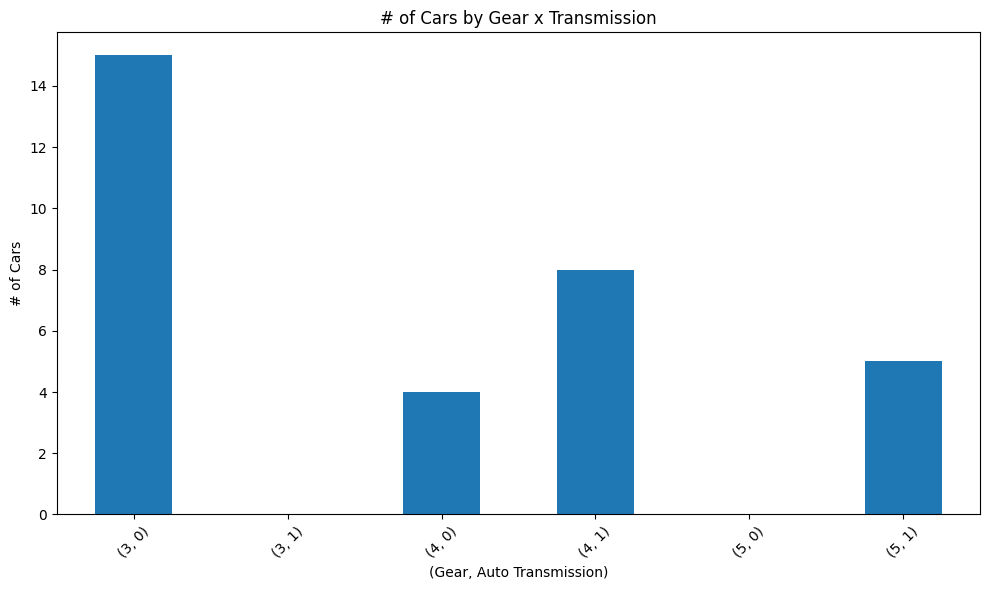

In [216]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 바 그래프 생성
result_crosstab.stack().plot(kind='bar')

# 그래프 제목과 레이블 설정
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')

# x축 레이블 회전 (보기 편하게)
plt.xticks(rotation=45)

# 그래프 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

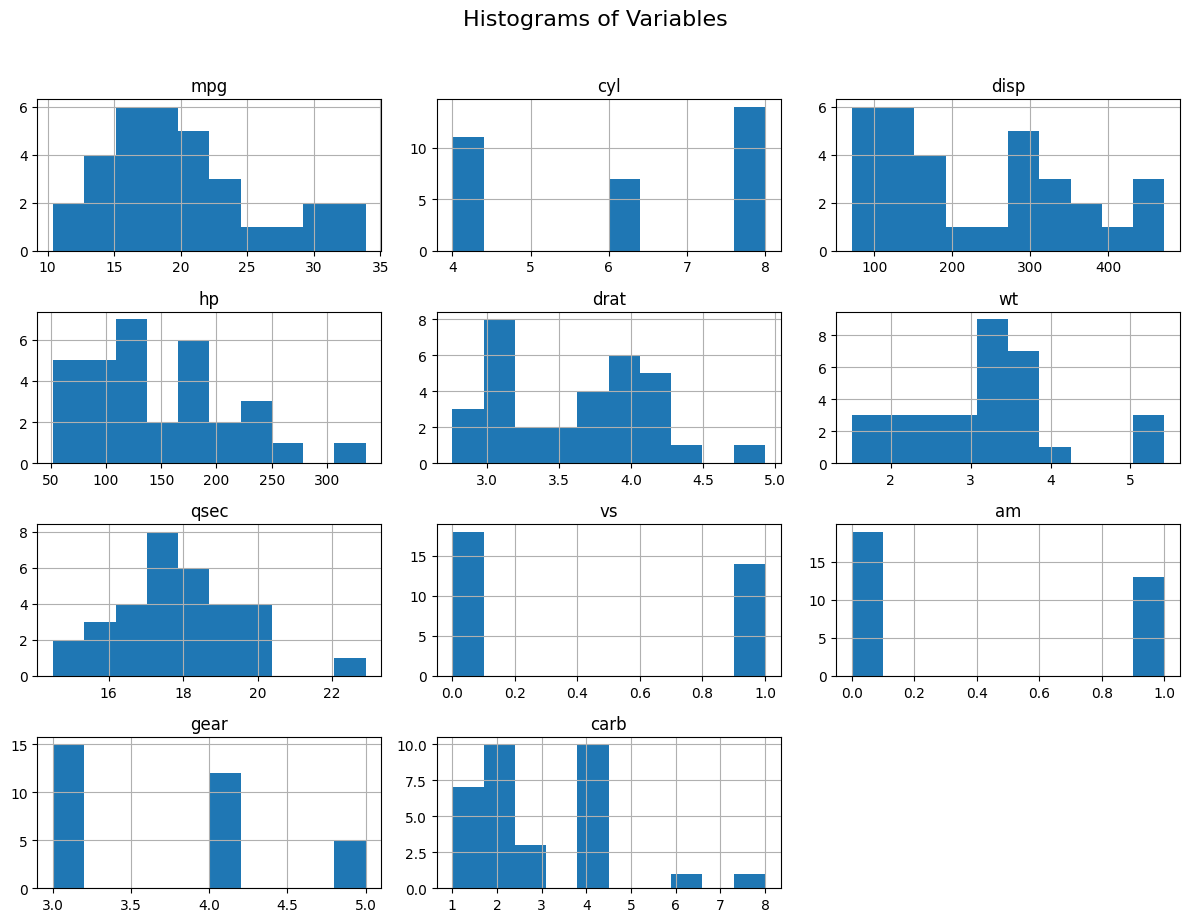

In [217]:
# 히스토그램 생성
df.hist(figsize=(12, 9))

# 전체 그래프의 제목 설정
plt.suptitle("Histograms of Variables", size=16, y=1.02)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

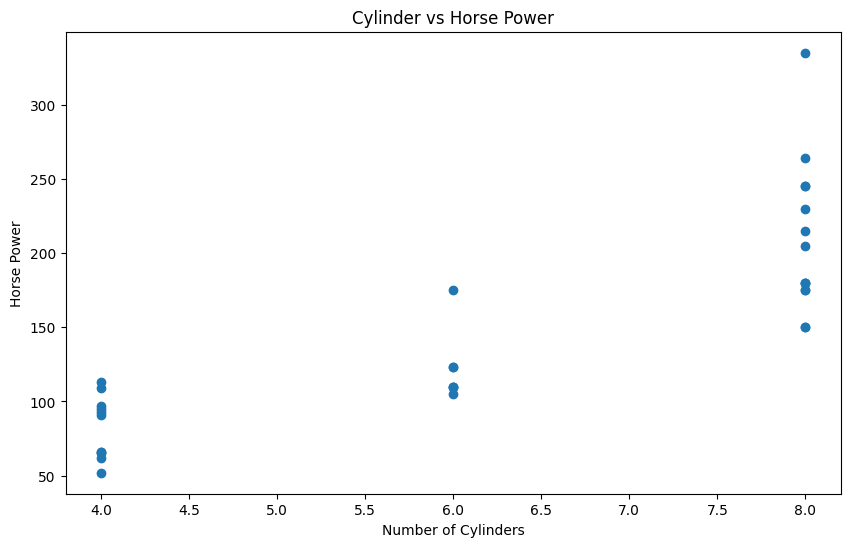

In [218]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 산점도 그리기
plt.scatter(df['cyl'], df['hp'])

# 제목과 축 레이블 설정
plt.title('Cylinder vs Horse Power')
plt.xlabel('Number of Cylinders')
plt.ylabel('Horse Power')

# 그래프 표시
plt.show()

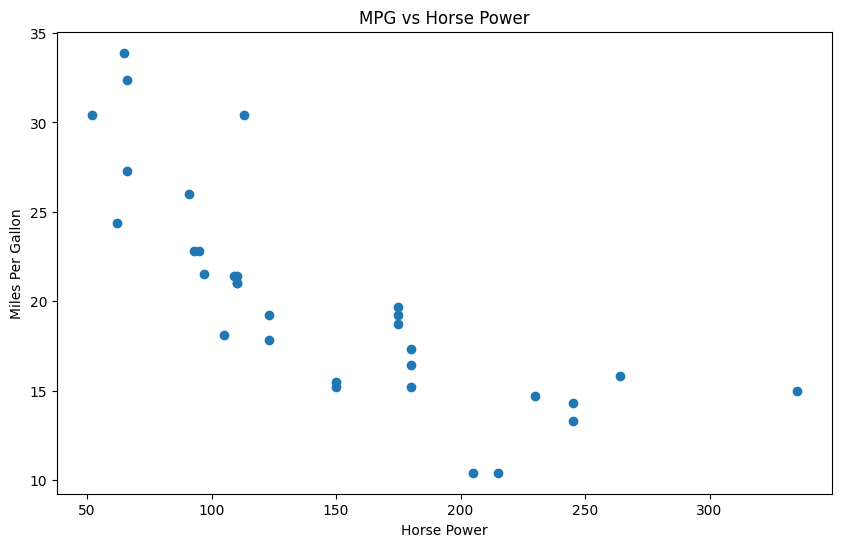

In [219]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 산점도 그리기
plt.scatter(df['hp'], df['mpg'])

# 제목과 축 레이블 설정
plt.title('MPG vs Horse Power')
plt.xlabel('Horse Power')
plt.ylabel('Miles Per Gallon')

# 그래프 표시
plt.show()

In [220]:
# 상관계수 행렬 계산
correlation_matrix = df.drop('name', axis=1).corr()

# 상관계수 행렬 출력
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [221]:
# 상관계수 행렬의 상삼각 부분만 리스트 컴프리헨션으로 추출
pairs = [(i, j, correlation_matrix.loc[i, j]) 
         for i in correlation_matrix.index 
         for j in correlation_matrix.columns if i < j]

# 정렬 후 상관관계가 높은 변수 쌍 n개까지 출력
n = 15
print(f"[Top {n} pairs with highest correlation]")
sorted_pairs = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)

for i, pair in enumerate(sorted_pairs[:n], 1):
    print(f"{i}th: ({pair[0]}, {pair[1]}, {pair[2]:.6f})")

[Top 15 pairs with highest correlation]
1th: (cyl, disp, 0.902033)
2th: (disp, wt, 0.887980)
3th: (mpg, wt, -0.867659)
4th: (cyl, mpg, -0.852162)
5th: (disp, mpg, -0.847551)
6th: (cyl, hp, 0.832447)
7th: (cyl, vs, -0.810812)
8th: (am, gear, 0.794059)
9th: (disp, hp, 0.790949)
10th: (cyl, wt, 0.782496)
11th: (hp, mpg, -0.776168)
12th: (carb, hp, 0.749812)
13th: (qsec, vs, 0.744535)
14th: (hp, vs, -0.723097)
15th: (am, drat, 0.712711)


[팀 활동 요구사항 1]

Q) 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요?

mtcars.csv 데이터셋에는 차량의 기능적인 스펙만 존재하며, 가격 및 사용자 경험과 같은 지표가 포함되어 있지 않습니다. 그렇기 때문에 데이터 분석을 통해 연비나 속도 같은 기능적 요소를 개선할 수 있는 정보를 찾는 것이 경제적 가치를 얻을 수 있는 방법이라고 생각하였습니다. 또한 데이터셋을 통해 변수들 간의 상관계수를 구하기 전에, 기본적으로 차량의 용도와 종류에 대한 기본적인 분류가 필요하다는 생각도 들었습니다. 가령 차량들을 소형, 준중형, 중형, 대형 등으로 나누고, 만들고자 하는 차량에 대해 더욱 집중적으로 분석을 하거나, 각각에 대해 분석을 진행한 이후 더욱 경쟁력 있는 제품을 만들어 낼 수 있는 차종을 선택하는 것이 합리적일 것일 것입니다. 이후 기능별 예상 제작비용 등의 데이터셋이 추가된다면 더욱 정밀한 데이터 분석이 가능하고, 경제적 가치를 극대화할 수 있을 것입니다.

Q) 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?

가격 및 사용자 경험에 대한 지표가 존재하지 때문에 해당 데이터셋을 통해, 고신형 차량 제작의 초기 기획 단계에서 기존 시장 제품의 특성을 분석하며 제작 시 경쟁력을 확보할 수 있는 차종을 선택하고 차량의 정량적 스펙을 설정하는 데에 (데이터셋을) 이용하며 경제적 가치를 확보할 수 있습니다. 또한 데이터셋를 분석할 때, 특히 속도(가속 성능)에서 좋은 성능을 확보하기 위해 qsec 변수와 관련된 지표에 집중할 것입니다. (연비 변수의 경우 무게와 관련된 타 변수들과 높은 음의 상관관계를 보이고 있지만, 무게는 차량의 용도에 따라 달라질 수 있으며 무게 외 다른 요소들과는 크게 높은 상관관계를 보이지 않았고, 이미 보편적으로 알려져있기도 하여 정보로서의 가치가 상대적으로 떨어진다는 판단 하에 집중 관찰할 대상에서 배제하였습니다.)

[팀 활동 요구사항 2]

Q) 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

1. qsec와 vs의 산점도

qsec와 vs이 양의 상관 관계를 가지고 있었고, 산점도에서도 이를 확인할 수 있었습니다.
vs의 값의 종류인 0과 1중 어떤 값이 V자 엔진을 나타내는지 검색해보았더니 0이 V자 엔진을 의미한다는 것을 알게되었습니다.
또한 qsec의 값이 작을수록 가속 성능이 높은 것을 의미하기에, V자 형태의 엔진이 높은 가속 성능과 관련이 있다는 것을 알 수 있었습니다.

2. qsec와 hp의 산점도

qsec와 hp는 음의 상관 관계를 가지고 있었고, 마찬가지로 산점도에서 이를 확인할 수 있었습니다.
hp는 마력을 의미하기에, 마력이 높을수록 가속 성능이 좋다는 결과를 얻을 수 있었습니다.
직관적으로도 납득이 가는 결과를 얻을 수 있었습니다.


토의에 사용한 2개의 조합에 대한 그래프는 다음과 같습니다.

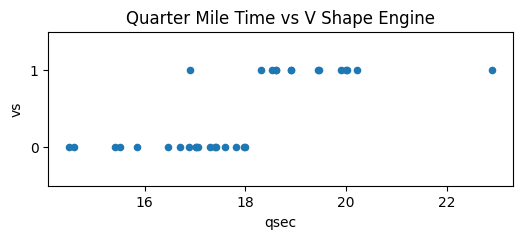

In [222]:
# qsec vs 마력 산점도
fig, axes = plt.subplots(figsize=(6, 2))
df.plot(x='qsec', y='vs', kind='scatter', ax=axes)
axes.set_yticks([0, 1])

plt.title("Quarter Mile Time vs V Shape Engine")
axes.set_ylim(-0.5, 1.5)
plt.show()

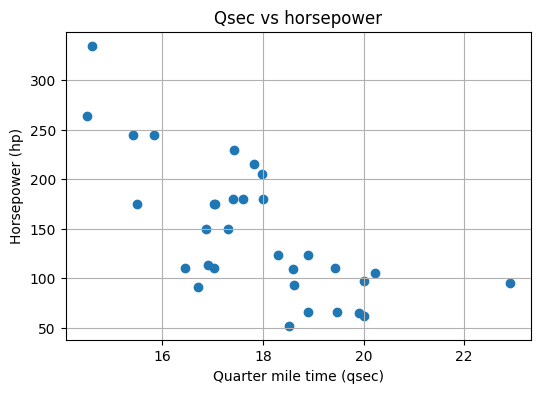

In [223]:
# qsec vs 마력 산점도
plt.figure(figsize=(6, 4))
plt.scatter(df['qsec'], df['hp'])
plt.title('Qsec vs horsepower')
plt.xlabel('Quarter mile time (qsec)')
plt.ylabel('Horsepower (hp)')
plt.grid(True)
plt.show()

아래는 토의를 위해 추가적으로 생성했던 보조 그래프입니다.

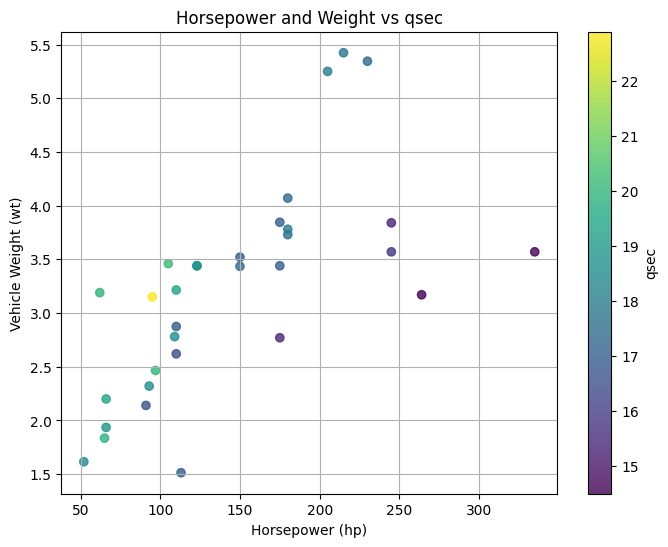

In [224]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['hp'], df['wt'], c=df['qsec'], cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='qsec')
plt.title('Horsepower and Weight vs qsec')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Vehicle Weight (wt)')
plt.grid(True)
plt.show()